In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sp
from mpl_toolkits.mplot3d import Axes3D
import math
import scipy.optimize as op

In [2]:
def ComputeCost(theta, x, y):
    m = len(y) + 0.0
    diff = x.dot(theta) - y
    J = (1/(2*m))*sum(diff*diff)
    return J[0]

In [3]:
def ComputeGradient(theta, x, y):
    grad = np.transpose(x).dot(x.dot(theta) - y)
    return grad.flatten()

In [4]:
def GradientDescent(theta, x, y, alpha, num_iter):
    # Capture cost with iteration
    J_list = []
    m = len(y)
    for i in range(0,num_iter):
        #theta = theta - (alpha/m)*np.transpose([sum((x.dot(theta) - y)*x)])
        theta = theta - (alpha/m)*np.transpose(x).dot(x.dot(theta) - y)
        J = ComputeCost(theta, x, y)
        J_list.append(J)
    return theta, J_list

In [5]:
def sigmoid(z):
    g = 1.0/(1+np.exp(-z))
    return g

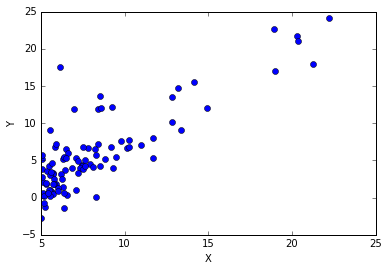

In [6]:
#import data into lists
filepath = '../ex1/ex1data1.txt'
x_in = []
y_in = []
f = open(filepath)
for line in f:
    data = line.split(',')
    x_in.append(float(data[0]))
    y_in.append(float(data[1]))
plt.plot(x_in,y_in,'o')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [7]:
#convert from list to array. Add 1's to x matrix
x = np.asarray(x_in)
y = np.asarray(y_in)
ones_x = np.ones_like(y) + 0.0
x = np.transpose([ones_x, x])
y = np.transpose([y])
#Number of features (n) and data points (m)
m = len(x)
n = len(x[0])
#initialize theta
theta = np.transpose([np.zeros((n), float)])

In [8]:
# Training
alpha = 0.01
num_iter = 1500
theta, J_list = GradientDescent(theta, x, y, alpha, num_iter)

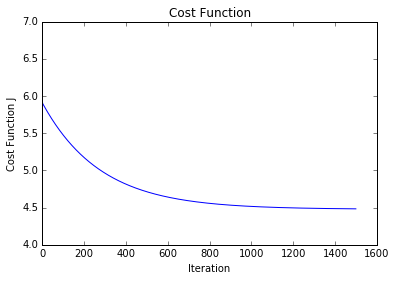

In [9]:
# Plot the cost function over iterations
plt.plot(J_list)
plt.ylabel('Cost Function J')
plt.xlabel('Iteration')
plt.title('Cost Function')
plt.show()

In [10]:
# Predict y using the theta from training
x_test_arr = np.asarray(np.arange(5.0,25.0, 0.1))
ones_x_test = np.ones_like(x_test_arr) + 0.0
x_test = np.transpose([ones_x_test, x_test_arr])
y_pred = x_test.dot(theta)

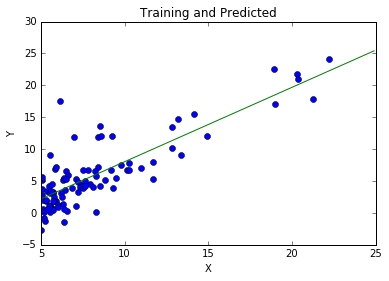

In [11]:
# Plot fitted model alongside training data
plt.plot(x_in,y_in,'o')
plt.plot(x_test[:,1], y_pred)
plt.title('Training and Predicted')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()